# グラフで2バイト文字を使うためのライブラリのインストール

In [1]:
!pip install japanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 29.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=47d38ec3b8330d55c7a6638907d30bc730e917c77dfed2f058a4cfb58d9205ea
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


# 関数 save_fig：図の保存用

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

def save_fig(plt, file_prefix):
    if file_prefix == '':
        return
    
    parent = os.path.dirname(os.path.abspath(file_prefix))
    os.makedirs(parent, exist_ok=True)
    plt.savefig(f'{file_prefix}.pdf', transparent=True, bbox_inches='tight', pad_inches = 0)
    plt.savefig(f'{file_prefix}.png', transparent=True, dpi=300, bbox_inches='tight', pad_inches = 0)

# 実習4.1：リストへの値の追加

In [4]:
values=[] # 空のリストを作成

print('要素数：', len(values))

values.append(1) # 整数の1を追加
print(values)
print('要素数：', len(values))

values.append(99) # 整数の99を追加
print(values)
print('要素数：', len(values))

要素数： 0
[1]
要素数： 1
[1, 99]
要素数： 2


# 実習4.2：複数の値を返す関数

In [5]:
def calc(x,y):
    a=x+y
    b=x-y
    c=x*y
    d=x/y
    return a,b,c,d

# 関数の外
add,sub,mul,div=calc(10,2)
print('和 =', add)
print('差 =', sub)
print('積 =', mul)
print('商 =', div)

和 = 12
差 = 8
積 = 20
商 = 5.0


# 関数 plot_history：勾配法による値の履歴を可視化する

In [6]:
import matplotlib.pyplot as plt
import japanize_matplotlib

def plot_history(x_history, y_history, file_prefix=''):
    plt.figure(figsize=(8, 8))
    xs = np.linspace(-0.5, 0.5, 100)
    plt.plot(xs, xs**2)
    plt.scatter(x_history, y_history, s=20, c='red')
    plt.plot(x_history, y_history, lw=1, ls='dashed',color='black')
    plt.xlabel('x', fontsize=14)
    plt.ylabel('y', fontsize=14)
    save_fig(plt, file_prefix)
    plt.show()

# 実習4.3：勾配法による関数の最小化

y=x*xの最小値: 3.341873634710927e-10
最小値を与えるx: 1.8280792200314863e-05


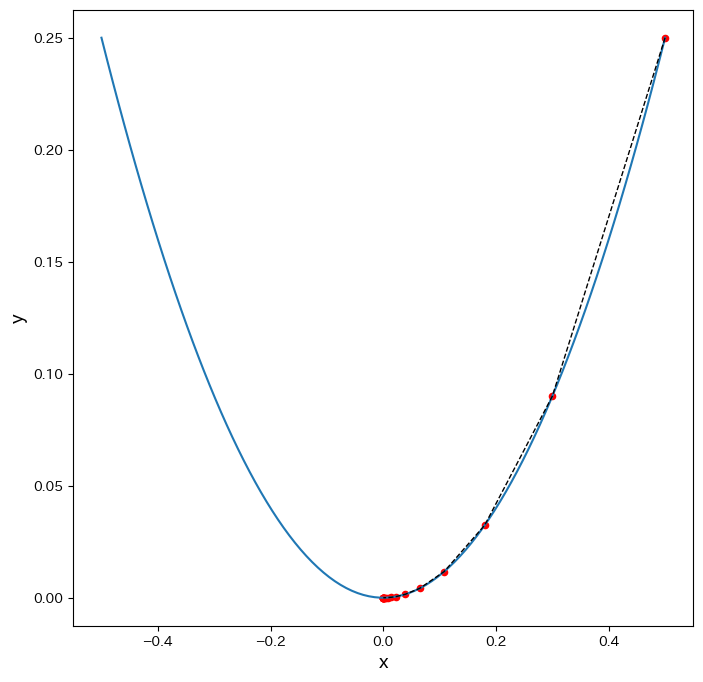

In [7]:
import numpy as np

def gradient_descent(lr):
    """勾配法によりy=x*xの最小値を求める。
    Args:
        lr (float): 学習率(learning rate)
    Returns:
        x_history: 勾配法によって更新されたxの値を格納したリスト
        y_history: 更新されたxを使って求めたx * xの値を格納したリスト
    """
    x=0.5 # 初期値
    x_history=[] # xの履歴を格納するリスト
    x_history.append(x) # 初期値を追加

    y_history=[] # x*xの履歴を格納するリスト
    y_history.append(x*x) # 初期値についてのx*xを追加

    # f(x) = x * xの導関数は2 * x
    for i in range(20): # 反復関数を20回とする
        x=x-lr*(2*x) # 学習則に従いxの値を更新
        x_history.append(x) # 履歴に追加
        y_history.append(x*x) # x*xの値を履歴に追加

    return x_history,y_history   

############################################
# 関数の外
x_history,y_history=gradient_descent(lr=0.2)

# yの最小値を与えるインデックスを取得
min_index=np.argmin(y_history)
print('y=x*xの最小値:',y_history[min_index])
print('最小値を与えるx:',x_history[min_index])

# 勾配法によって更新されたとxそのときのyの値をプロット
plot_history(x_history,y_history)

# 実習4.4：学習率が小さすぎる場合

y=x*xの最小値: 0.23076060035675847
最小値を与えるx: 0.48037547851317147


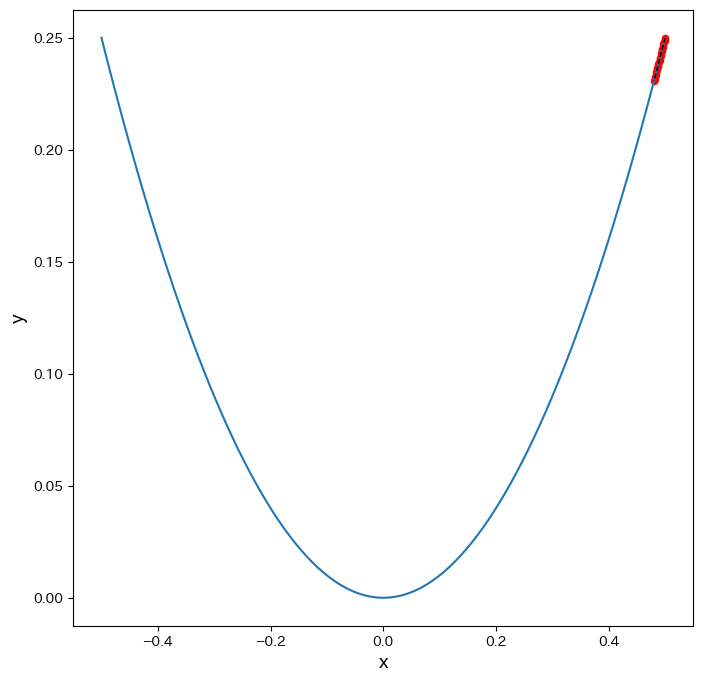

In [25]:
x_history,y_history=gradient_descent(lr=0.001)
print('y=x*xの最小値:',y_history[min_index])
print('最小値を与えるx:',x_history[min_index])

plot_history(x_history,y_history)

# 実数4.5：学習率が大きすぎる場合

y=x*xの最小値: 0.1114251009877376
最小値を与えるx: 0.333803985877547


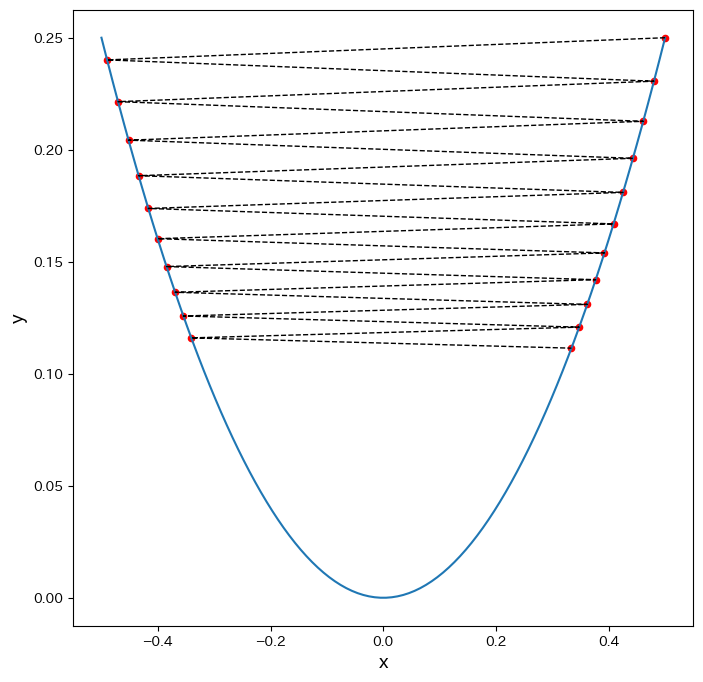

In [26]:
x_history,y_history=gradient_descent(lr=0.99)
print('y=x*xの最小値:',y_history[min_index])
print('最小値を与えるx:',x_history[min_index])

plot_history(x_history,y_history)

# 実習4.6：データの前処理

In [9]:
import pandas as pd

# CSVファイル data3.csv の内容をデータフレームとして読み込む
df = pd.read_csv('data3.csv')

x=df['体温'] # 体温をデータフレームから取り出す
y=df['感染状態'] # 正解クラスをデータフレームから取り出す

x=x.to_numpy() # データ型をNumpy配列に変換
y=y.to_numpy() # データ型をNumpy配列に変換

# 入力関数xを標準化するために平均と標準偏差を計算
m=np.mean(x) # 平均 
s=np.std(x) # 標準偏差

print('平均:', m) 
print('標準偏差:', s) 

# 標準化
z=(x-m)/s

平均: 37.326722242433014
標準偏差: 0.9884492106506017


# 実習4.7：シグモイド関数の定義

In [10]:
def sigmoid(w0,w1,x):
    """シグモイド関数

    Args:
        w0 (float): 重み
        w1 (float): バイアス
        x (ndarray): 入力変数
    Returns:
        (ndarray): xの各値についてクラス1である条件付確率の配列
    """
    u=w0*x+w1
    return 1/(1+np.exp(-u))

############################################
# 関数の外
# シグモイド関数のテスト
############################################
w0=1 # 重みを初期化
w1=-1 # バイアスを初期化
y_pred=sigmoid(w0,w1,z)
print(y_pred)

[0.37156845 0.13186005 0.12073301 0.19480423 0.26574927 0.22177565
 0.50284462 0.42539647 0.16566451 0.15208328 0.05638057 0.61957777
 0.13274331 0.17345343 0.18207311 0.08975558 0.0783248  0.2551684
 0.19071975 0.74778981 0.65801424 0.14921876 0.43074463 0.24062332
 0.57962888 0.14019968 0.45033042 0.25907651 0.63187932 0.47735556]


# 実習4.8：交差エントロピー誤差の定義

In [11]:
def cee(y,y_pred):
    """平均交差エントロピー誤差を計算する。

    Args:
        y (ndarray): 正解ラベル
        y_pred (ndarray): クラス1である条件付き確率の配列
    Returns:
        (float): 平均交差エントロピー誤差
    """
    # log(x)において、x=0となったときにマイナス無限大に
    # 発散するのを防ぐ。log(0)の代わりにlog(0+h)を計算する。
    h=1e-4 
    N=len(y) # データ数
    E=-np.sum(y*np.log(y_pred+h)+(1-y)*np.log(1-y_pred+h))/N
    return E
############################################
# 関数の外
# 関数ceeのテスト
############################################
w0=1 # 重みを初期化
w1=-1 # バイアスを初期化
y_pred=sigmoid(w0,w1,z)
e=cee(y,y_pred)
print(e)

0.5233255102507137


# 実習4.9：交差エントロピー誤差の勾配

In [14]:
def dcee(x,y,y_pred):
    """平均交差エントロピー誤差のパラメータについての勾配を計算する。

    Args:
        x (ndarray): 入力変数（体温）
        y (ndarray): 正解ラベル
        y_pred (ndarray): xの各値についてクラス1である条件付き確率の配列
    Returns:
        ndarray: 平均交差エントロピー誤差のパラメータについての勾配
    """
    N=len(x) # データ数
    d0=-np.sum((y-y_pred)*x)/N
    d1=-np.sum(y-y_pred)/N
    return d0,d1
############################################
# 関数の外
# 関数dceeのテスト
############################################
w0=1 # 重みを初期化
w1=-1 # バイアスを初期化
y_pred=sigmoid(w0,w1,z)
grad_w0,grad_w1=dcee(z,y,y_pred)
print(grad_w0,grad_w1)

-0.19562913688149255 -0.1968154205767612


# 実習4.10：勾配法と学習則による学習

In [15]:
w0=1 # 重みを初期化
w1=-1 # バイアスを初期化
lr=0.01 # 学習率

for i in range(3000):  # パラメータ更新を3000回繰り返す
    y_pred=sigmoid(w0,w1,z)
    e=cee(y,y_pred)
    grad_w0,grad_w1=dcee(z,y,y_pred)
    w0=w0-lr*grad_w0 # 学習則に従い、w0を更新
    w1=w1-lr*grad_w1 # 学習則に従い、w1を更新

print('パラメータの更新終了')
print(e,w0,w1)

パラメータの更新終了
0.26798255630454676 2.830580411367014 0.24244102856011712


# 実習4.11：正解率の算出

In [16]:
from sklearn.metrics import accuracy_score

# 推定したパラメータを使い、各xの値についてクラス1である条件付き確率を計算
y_pred=sigmoid(w0,w1,z)

# 条件付き確立が0.5以上か、それ以外かでクラスを決定
# 実習2.15参照
c_pred=(y_pred>=0.5)*1

# 関数accuracy_scoreに正解ラベルと予測ラベルを渡して、正解率を計算
v=accuracy_score(y,c_pred)
print('正解率：',v)

正解率： 0.9


# おまけ

最小損失を与えるw0とw1: 4.646464646464646 0.8585858585858581
最小損失を与えるw0とw1のインデックス: 46 58
最小損失を与えるパラメータによる正解率: 0.8666666666666667


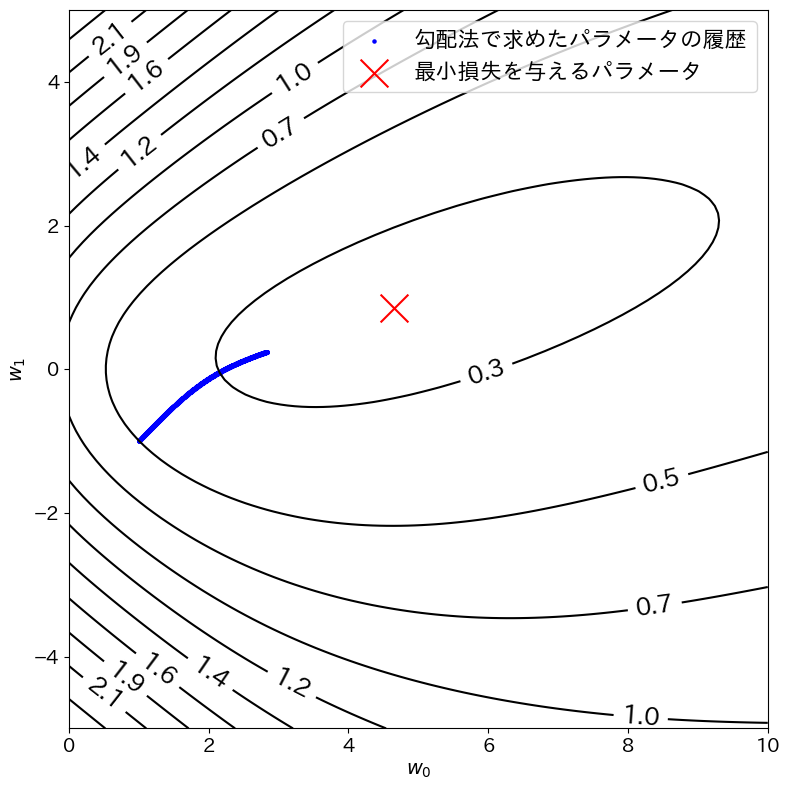

In [17]:
# 実習4.10で更新するw0とw1の履歴を記録する
w0 = 1 # 重みを初期化
w1 = -1 # バイアスを初期化
lr = 0.01 # 学習率

w0_history = []
w0_history.append(w0)

w1_history = []
w1_history.append(w1)

for i in range(3000): # パラメータ更新を3000回繰り返す
    y_pred = sigmoid(w0, w1, z)
    e = cee(y, y_pred)
    grad_w0, grad_w1 = dcee(z, y, y_pred)
    w0 = w0 - lr * grad_w0 # 学習則に従い、w0を更新
    w1 = w1 - lr * grad_w1 # 学習則に従い、w1を更新
    w0_history.append(w0)
    w1_history.append(w1)
    
# 損失の等高線を描く
w0s = np.linspace(0, 10, 100) # w0の値を[0, 10]の範囲で等間隔に100点用意
w1s = np.linspace(-5, 5, 100) # w1の値を[-5, 5]の範囲で等間隔に100点用意

# w0とw1の値の組み合わせを用意
ww0, ww1 = np.meshgrid(w0s, w1s)

# w0とw1の値の組み合わせについて損失を格納する配列
C = np.zeros((len(w1s), len(w0s)))

# w0とw1の値の組み合わせについて損失を計算
for j in range(len(w1s)):
    for i in range(len(w0s)):
        y_pred = sigmoid(w0s[i], w1s[j], z)
        C[j, i] = cee(y, y_pred)
        
# 損失の最小値を与えるw0, w1
index = np.argmin(C.flatten())
opt_j = index // len(w1s)
opt_i = index % len(w0s)
print('最小損失を与えるw0とw1:', w0s[opt_i], w1s[opt_j])
print('最小損失を与えるw0とw1のインデックス:', opt_i, opt_j)

# 損失が最小となるパラメータを使い、正解率を算出
y_pred = sigmoid(w0s[opt_i], w1s[opt_j], z)
c_pred = (y_pred >= 0.5) * 1
v = accuracy_score(y, c_pred)
print('最小損失を与えるパラメータによる正解率:', v)

plt.figure(figsize=(8, 8))
levels = np.linspace(0.3, 2.3, 10) # 描画する等高線のレベル
cont = plt.contour(ww0, ww1, C, colors='black', levels=levels) # 等高線描画

plt.scatter(w0_history, w1_history, s=5, c='blue', label='勾配法で求めたパラメータの履歴')

plt.scatter(w0s[opt_i], w1s[opt_j], c='red', s=400, marker='x', label='最小損失を与えるパラメータ')

plt.xlabel('$w_0$', fontsize=14)
plt.ylabel('$w_1$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=16)
cont.clabel(fmt='%1.1f', fontsize=18)
plt.tight_layout()
save_fig(plt, file_prefix='おまけ_損失の等高線とパラメータの更新履歴')
plt.show()